The following code creates a csv file containing the AVA classes in a format compatible with the one required by Keras RetinaNet

In [ ]:


import csv
result1 = "" 
result2 = ""
# open the original actions file by AVA
with open('ava_action_list_v2.2.pbtxt') as f:
    txt = f.readlines()
# retrieve the name and the ID for each action
for i in range(len(txt)):
  if ("name" in txt[i]) and ("label_id" in txt[i+1]) :
    #get the label id
    aux = txt[i+1].split(" ")
    result1 = aux[3]
    result1 = result1.replace('\n', '')
    #print("result 1 is: ", result1)

    #get the name 
    aux = txt[i].split(' "')
    result2 = aux[1]
    result2 = result2.replace('"', '')
    #result2 = result2.replace('\n', '')
    #print("result 2 is: ", result2)

    # write the action and the id in a new file
    with open('ava_actions.csv', mode='a') as annotation_file:
              annotation_file = csv.writer(annotation_file, delimiter=',')
              annotation_file.writerow([result2,result1])


In [ ]:
# this removes the '\n' character from the label_id string
if "label_id" in txt[2]:
  aux = txt[2].split(" ")
  result = aux[3]
  result = result.replace('\n', '')

print(result)

1


In [ ]:
# this removes the '\n' character from the name string
if "name" in txt[1]:
  aux = txt[1].split(' "')
  result = aux[1]
  result = result.replace('"', '')

print(result)

bend/bow (at the waist)



Here I create a definitive actions file with only the classes that are present in the annotation file

In [ ]:


import csv
check_list = []

with open('AVA_annotations.csv', mode='r') as annotation_file:
  annotation_file = csv.reader(annotation_file, delimiter=',')
  for row in annotation_file:
    with open('ava_actions_v2.csv', mode='a') as csv_writer:
      csv_writer = csv.writer(csv_writer, delimiter=',')
      if (row[5] in check_list):
        print("element is already in list")
      else:
        csv_writer.writerow([row[5]])
      
      check_list.append(row[5])

    

The following code remove the '\n' character from the specified section of the row

In [30]:
import csv

with open('AVA_annotations.csv', mode='r') as annotation_file:
  annotation_file = csv.reader(annotation_file, delimiter=',')
  for row in annotation_file:
    row[5] = row[5].replace('\n', '')
    
    with open('AVA_annotations_v2.csv', mode='a') as csv_writer:
      csv_writer = csv.writer(csv_writer, delimiter=',')
      csv_writer.writerow([row[0], row[1], row[2], row[3], row[4], row[5]])

In [27]:
with open('ava_actions_v2.csv', mode='r') as annotation_file:
  annotation_file = csv.reader(annotation_file, delimiter=',')
  for row in annotation_file:
    row[0] = row[0].replace('\n', '')
    
    with open('ava_actions_v2.1.csv', mode='a') as csv_writer:
      csv_writer = csv.writer(csv_writer, delimiter=',')
      csv_writer.writerow([row[0]])

While the following code write an ID next to each class name (i.e. to each action name)

In [28]:
counter = 1

with open('ava_actions_v2.1.csv', mode='r') as annotation_file:
  annotation_file = csv.reader(annotation_file, delimiter=',')
  for row in annotation_file:
    with open('ava_actions_v3.csv', mode='a') as csv_writer:
      csv_writer = csv.writer(csv_writer, delimiter=',')
      csv_writer.writerow([row[0], counter])
      counter += 1


Below is the code to print a blu box inside an image, in a specified (by the user)location. This will be used in the data extraction to improve interpretability of the process

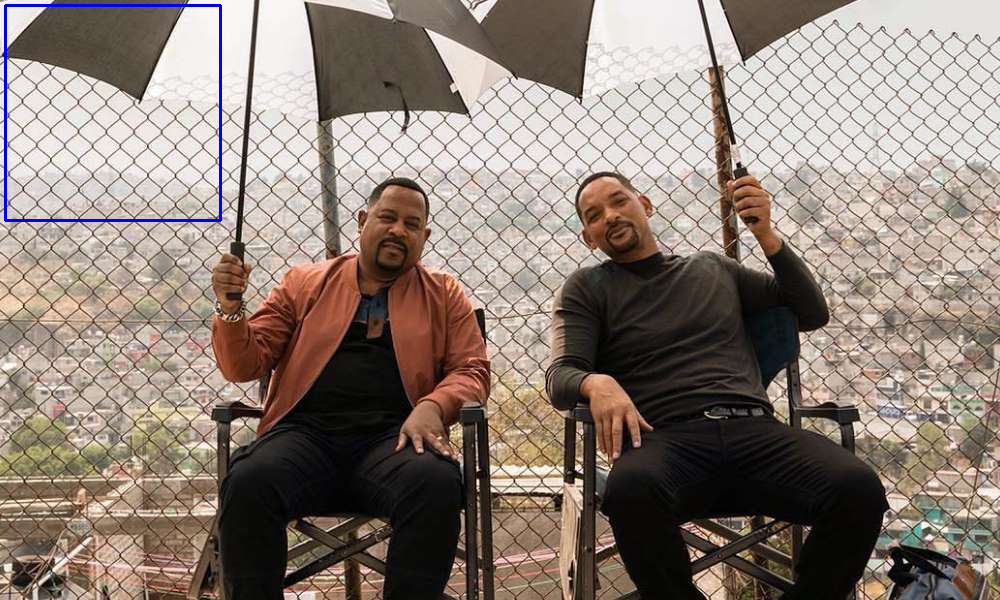

In [ ]:

# importing cv2  
import cv2  
from google.colab.patches import cv2_imshow
   
# path  
path = '/content/badboys.jpg'
   
# Reading an image in default mode 
image = cv2.imread(path) 
   
# Window name in which image is displayed 
window_name = 'Image'
  
# Start coordinate, here (5, 5) 
# represents the top left corner of rectangle 
start_point = (5, 5) 
  
# Ending coordinate, here (220, 220) 
# represents the bottom right corner of rectangle 
end_point = (220, 220) 
  
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(image, start_point, end_point, color, thickness) 
  
# Displaying the image  
cv2_imshow(image)  